<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Class%20Notes/Notes/BDS35_27SEP_Stock_Projecct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/Stock_data.csv')
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [8]:
#1) A 12-period EMA and 26-period EMA are two moving averages. Calculate them and plot These two with Close price in a line chart

<ipython-input-43-f1a073d01adc>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


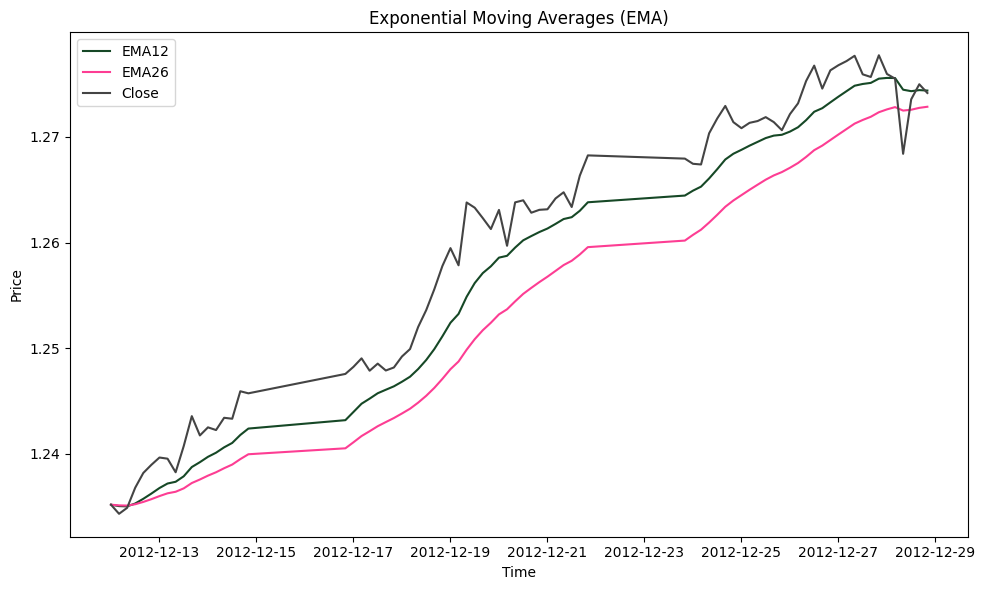

In [43]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y')

start_date = '12.12.2012'
end_date = '30.12.2012'

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Gmt time'], ema_12, color='#164826', label='EMA12')
plt.plot(filtered_df['Gmt time'], ema_26, color='#fd3d93', label='EMA26')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Exponential Moving Averages (EMA)')

plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
# 2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

# a)  compare SMA 12 EMA 12 and CLOSE

# b) compare SMA 26 EMA 26 and CLOSE

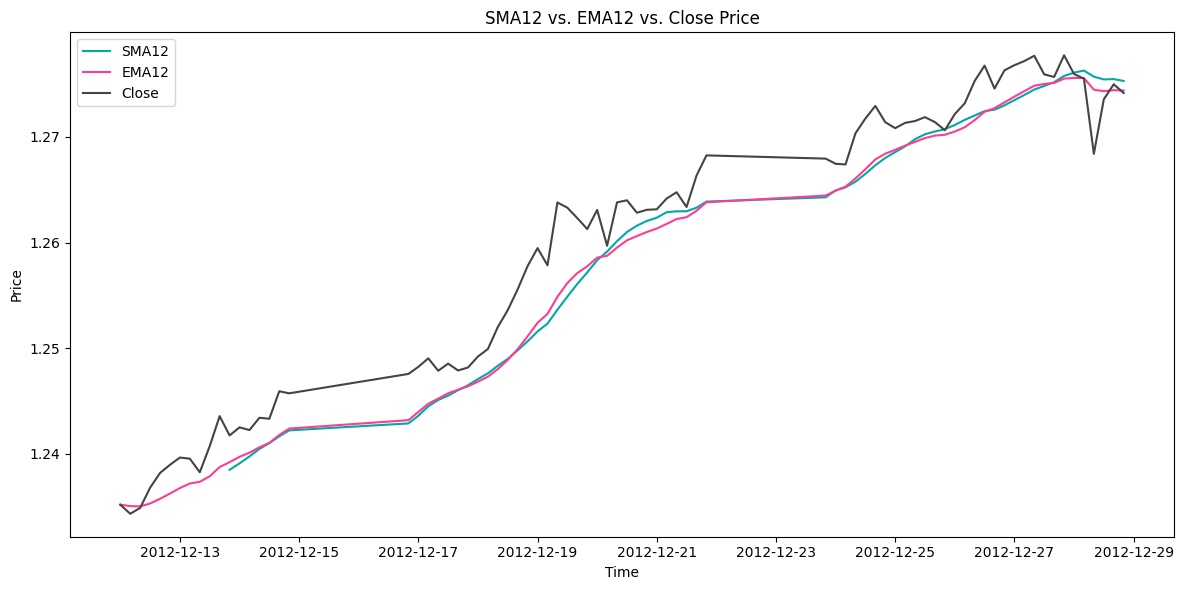

In [52]:
start_date = '12.12.2012'
end_date = '30.12.2012'

sma_12 = filtered_df['Close'].rolling(window=12).mean()
ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(12, 6))

plt.plot(filtered_df['Gmt time'], sma_12, color='#00A9A5', label='SMA12')
plt.plot(filtered_df['Gmt time'], ema_12, color='#fd3d93', label='EMA12')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('SMA12 vs. EMA12 vs. Close Price')

plt.legend()

plt.tight_layout()

plt.show()

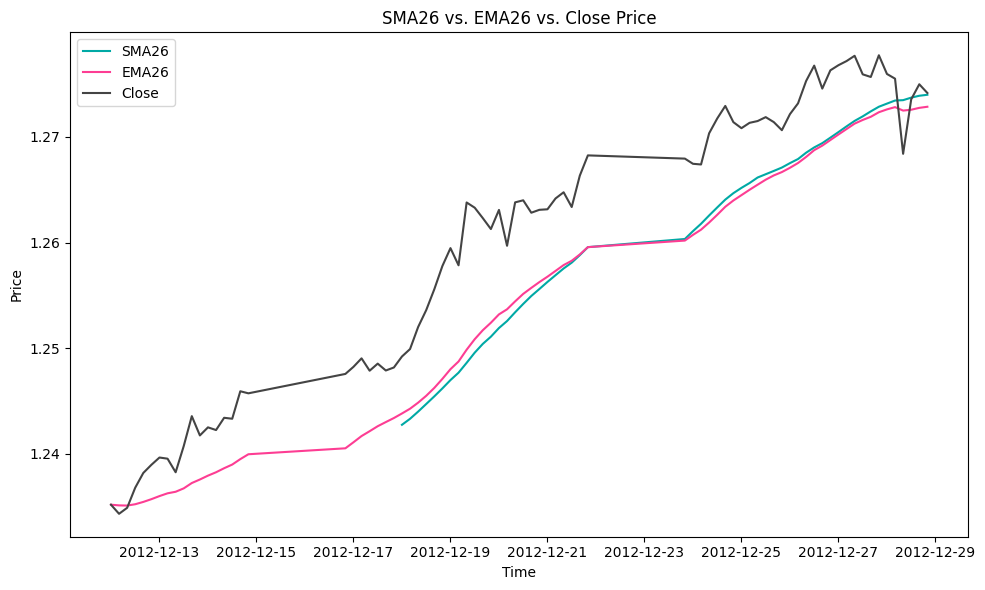

In [51]:
start_date = '12.12.2012'
end_date = '30.12.2012'

sma_26 = filtered_df['Close'].rolling(window=26).mean()
ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Gmt time'], sma_26, color='#00A9A5', label='SMA26')
plt.plot(filtered_df['Gmt time'], ema_26, color='#fd3d93', label='EMA26')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('SMA26 vs. EMA26 vs. Close Price')

plt.legend()

plt.tight_layout()

plt.show()


In [38]:
# 3) calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

<ipython-input-68-62554dbdb1a4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


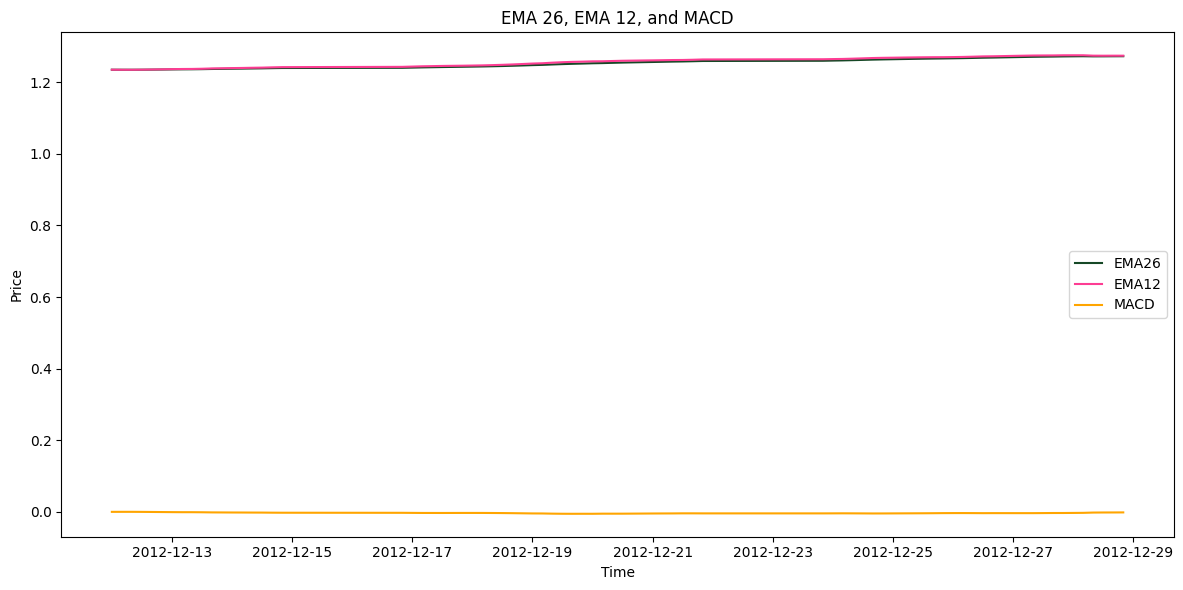

In [68]:
start_date = '12.12.2012'
end_date = '30.12.2012'

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()
ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()

macd = ema_26 - ema_12

plt.figure(figsize=(12, 6))

plt.plot(filtered_df['Gmt time'], ema_26, color='#164826', label='EMA26')
plt.plot(filtered_df['Gmt time'], ema_12, color='#fd3d93', label='EMA12')
plt.plot(filtered_df['Gmt time'], macd, color='#FFA500', label='MACD')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('EMA 26, EMA 12, and MACD')

plt.legend()

plt.tight_layout()

plt.show()
